In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
lemm = WordNetLemmatizer()
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18
nltk.download('all')

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package b

True

In [2]:
!unzip archive\ \(3\).zip

Archive:  archive (3).zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [3]:
train = pd.read_csv('/content/Corona_NLP_train.csv',encoding="latin-1")
test = pd.read_csv('/content/Corona_NLP_test.csv',encoding="latin-1")
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [5]:
train.drop(['UserName', 'ScreenName','Location', 'TweetAt' ], axis=1, inplace=True)
train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [6]:
test.drop(['UserName', 'ScreenName','Location', 'TweetAt' ], axis=1, inplace=True)

In [7]:
train["Sentiment"] = train["Sentiment"].str.replace("Extremely Negative", "Negative")
train["Sentiment"] = train["Sentiment"].str.replace("Extremely Positive", "Positive")

test['Sentiment'] = test.Sentiment.str.replace('Extremely Positive', 'Positive')
test['Sentiment'] = test.Sentiment.str.replace('Extremely Negative', 'Negative')

In [8]:
train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [9]:
test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Negative


In [10]:
data = pd.concat([train, test], ignore_index= True)
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...
44950,Meanwhile In A Supermarket in Israel -- People...,Positive
44951,Did you panic buy a lot of non-perishable item...,Negative
44952,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44953,Gov need to do somethings instead of biar je r...,Negative


In [11]:
contractions_dict = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'll": "he shall / he will",
    "he's": "he has / he is",
    "I'd": "I had / I would",
    "I'll": "I shall / I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it has / it is",
    "let's": "let us",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she had / she would",
    "she'll": "she shall / she will",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that has / that is",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'll": "they shall / they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'll": "we shall / we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what's": "what has / what is",
    "when's": "when has / when is",
    "where's": "where has / where is",
    "who'd": "who had / who would",
    "who'll": "who shall / who will",
    "who's": "who has / who is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you had / you would",
    "you'll": "you shall / you will",
    "you're": "you are",
    "you've": "you have"
}


def expand_contractions(text, contractions_dict):
    """
    This function replaces contractions in a given text with their expansions
    based on the provided contractions dictionary.
    """
    words = text.split()
    new_words = []
    for word in words:
        if word.lower() in contractions_dict:
            new_words.extend(contractions_dict[word.lower()].split("/"))
        else:
            new_words.append(word)
    return " ".join(new_words)

data["OriginalTweet"] = data["OriginalTweet"].apply(lambda x: expand_contractions(x, contractions_dict))

In [12]:
data["OriginalTweet"] = data["OriginalTweet"].str.lower()

In [13]:
import re
import string
data["OriginalTweet"] = data["OriginalTweet"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [14]:
def remove_urls(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'pic.twitter.com\S+', '', text)
    text = re.sub(r't\.co\S+', '', text)
    return text

data["OriginalTweet"] = data['OriginalTweet'].apply(remove_urls)

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

data["OriginalTweet"] = data['OriginalTweet'].apply(lambda x: remove_stopwords(x))

In [16]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["OriginalTweet"] = data['OriginalTweet'].apply(lambda x: lemmatize(x))

In [17]:
data["OriginalTweet"] = data['OriginalTweet'].str.strip()

In [18]:
data

,OriginalTweet,Sentiment
0,menyrbie philgahan chrisitv,Neutral
1,advice talk neighbour family exchange phone nu...,Positive
2,coronavirus australia woolworth give elderly d...,Positive
3,food stock one empty please panic enough food ...,Positive
4,ready go supermarket covid19 outbreak im paran...,Negative
...,...,...
44950,meanwhile supermarket israel people dance sing...,Positive
44951,panic buy lot nonperishable item echo need foo...,Negative
44952,asst prof economics cconces nbcphiladelphia ta...,Neutral
44953,gov need somethings instead biar je rakyat ass...,Negative


In [19]:
data.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

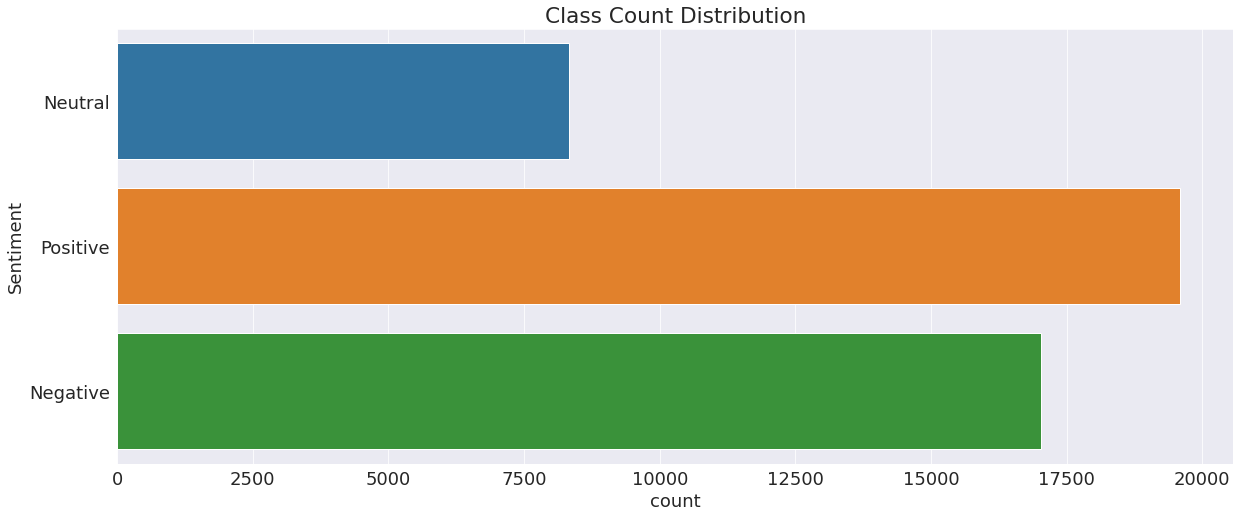

In [20]:
sns.countplot(data=data,y='Sentiment')
plt.title("Class Count Distribution")
plt.show()

In [21]:
positive_tweets = data.loc[data['Sentiment'] == 'Positive', 'OriginalTweet'].tolist()
negative_tweets = data.loc[data['Sentiment'] == 'Negative', 'OriginalTweet'].tolist()
neutral_tweets = data.loc[data['Sentiment'] == 'Neutral', 'OriginalTweet'].tolist()

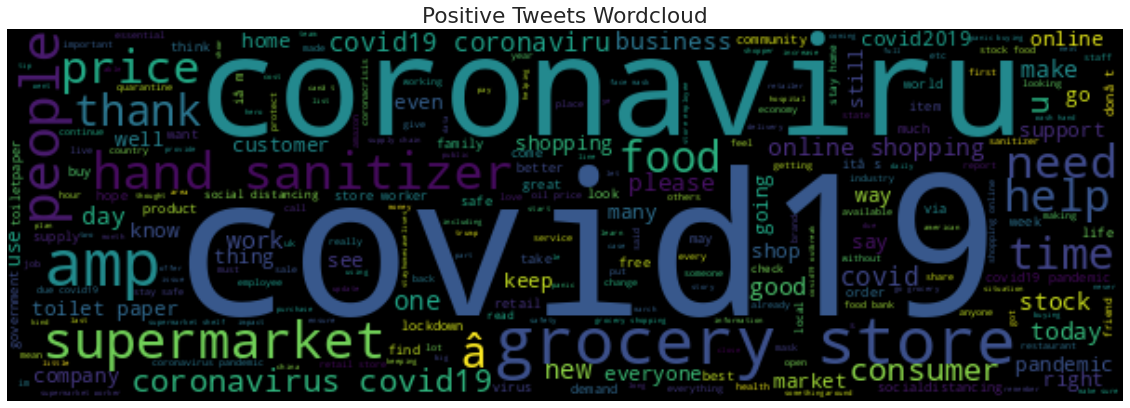

In [22]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(positive_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Tweets Wordcloud")
plt.axis("off")
plt.show()

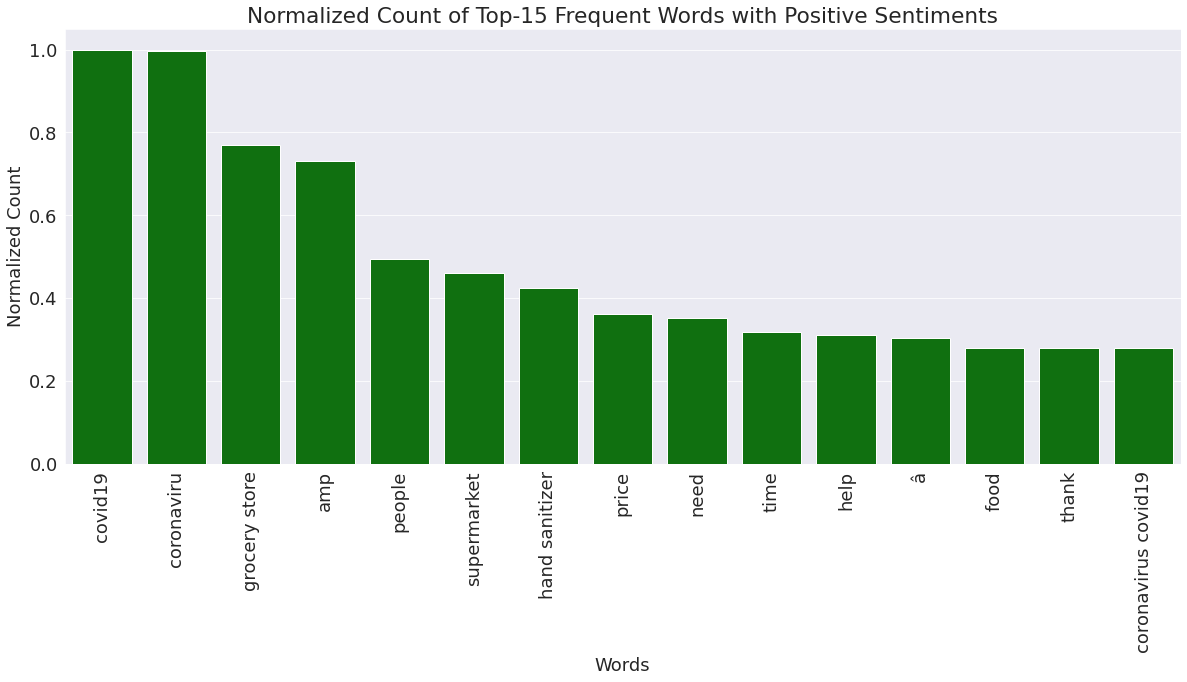

In [23]:
x = []
y = []
for key,value in wordcloud.words_.items(): # loop through the top 15 frequent words in the word cloud and append the word and its count to x and y lists
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='green')
plt.title("Normalized Count of Top-15 Frequent Words with Positive Sentiments")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

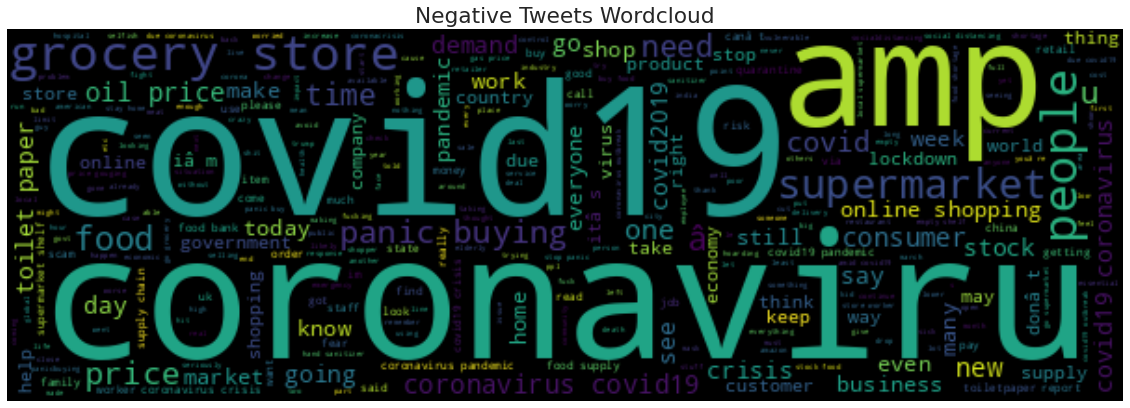

In [24]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(negative_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Tweets Wordcloud")
plt.axis("off")
plt.show()

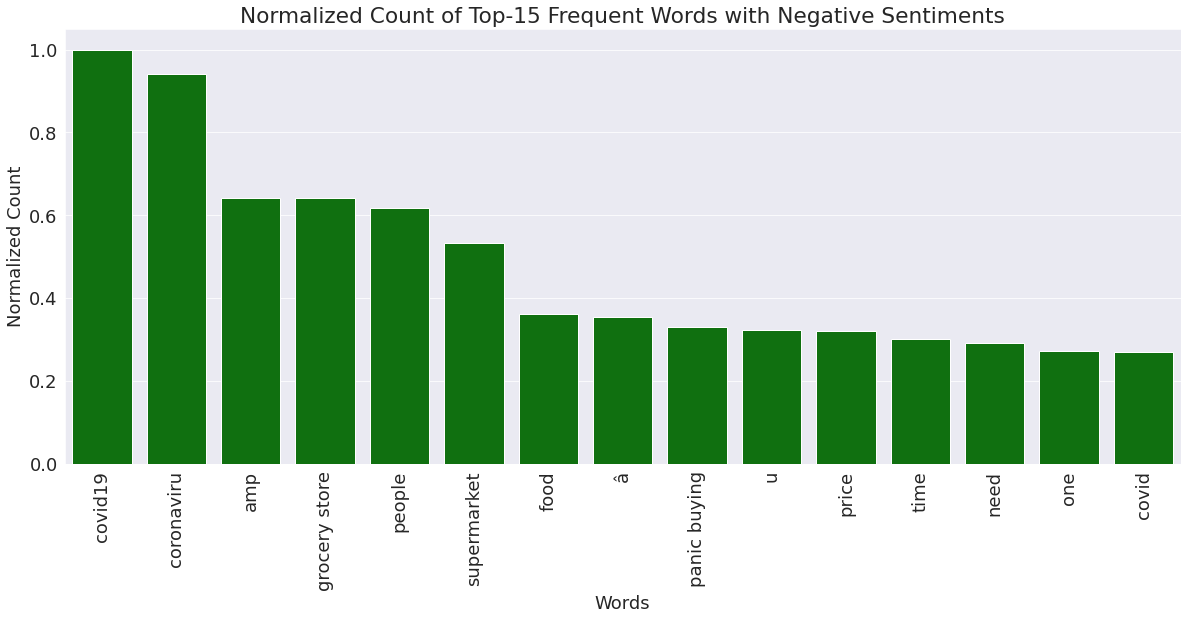

In [25]:
x = []
y = []
for key,value in wordcloud.words_.items(): # loop through the top 15 frequent words in the word cloud and append the word and its count to x and y lists
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='green')
plt.title("Normalized Count of Top-15 Frequent Words with Negative Sentiments")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

In [26]:
data['sentence_length'] = data['OriginalTweet'].progress_apply(lambda x: len(x.split()))

100%|██████████| 44955/44955 [00:00<00:00, 145357.24it/s]


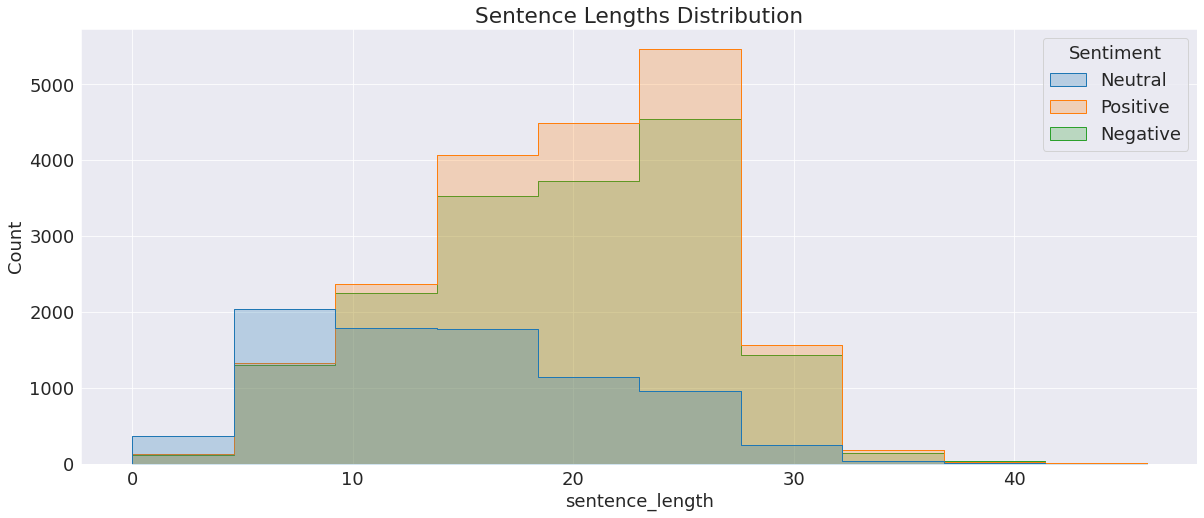

In [27]:
sns.histplot(data=data,x='sentence_length',hue='Sentiment',bins=10, element='step')
plt.title("Sentence Lengths Distribution")
plt.show()

In [28]:
data['sentence_length'].describe()

count    44955.000000
mean        18.544189
std          6.828264
min          0.000000
25%         13.000000
50%         19.000000
75%         24.000000
max         46.000000
Name: sentence_length, dtype: float64

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sentiment_encoded'] = le.fit_transform(data['Sentiment'])

data

,OriginalTweet,Sentiment,sentence_length,Sentiment_encoded
0,menyrbie philgahan chrisitv,Neutral,3,1
1,advice talk neighbour family exchange phone nu...,Positive,27,2
2,coronavirus australia woolworth give elderly d...,Positive,12,2
3,food stock one empty please panic enough food ...,Positive,22,2
4,ready go supermarket covid19 outbreak im paran...,Negative,22,0
...,...,...,...,...
44950,meanwhile supermarket israel people dance sing...,Positive,10,2
44951,panic buy lot nonperishable item echo need foo...,Negative,18,0
44952,asst prof economics cconces nbcphiladelphia ta...,Neutral,14,1
44953,gov need somethings instead biar je rakyat ass...,Negative,24,0


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [32]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2500)
X = vectorizer.fit_transform(data['OriginalTweet'].values.tolist()).toarray()
y = data['Sentiment_encoded'].values

In [33]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35964, 2500)
X_test shape: (8991, 2500)
y_train shape: (35964,)
y_test shape: (8991,)


In [36]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("--------------------Training Performance---------------------")
    print(accuracy_score(y_train,y_pred_tr))
    print(classification_report(y_train,y_pred_tr))
    print("-------------------------------------------------------------")
    print("--------------------Testing Performance----------------------")
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.4g',
            xticklabels=['Negative','Positive', 'Neutral'],yticklabels=['Negative','Positive', 'Neutral'])
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

--------------------Training Performance---------------------
0.6929985541096653
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     13638
           1       0.73      0.29      0.41      6651
           2       0.68      0.83      0.74     15675

    accuracy                           0.69     35964
   macro avg       0.71      0.62      0.63     35964
weighted avg       0.70      0.69      0.67     35964

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.6700033366700033
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3393
           1       0.67      0.25      0.36      1681
           2       0.66      0.82      0.73      3917

    accuracy                           0.67      8991
   macro avg       0.67      0.59      0.60      8991
weighted avg       0.67      0.67      0.65      8991



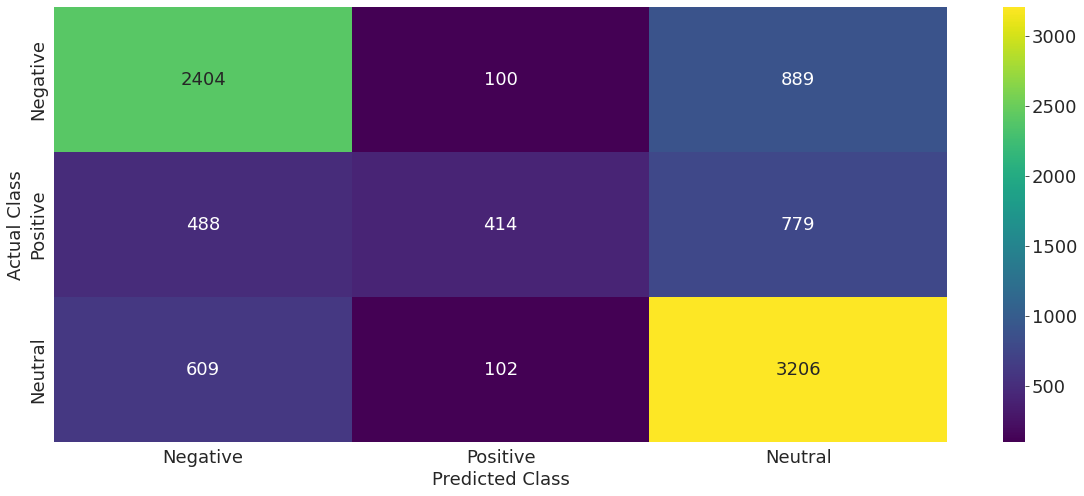

In [37]:
modelNB = MultinomialNB()
model_train(modelNB, X_train, X_test, y_train, y_test)

--------------------Training Performance---------------------
0.8174285396507619
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     13638
           1       0.76      0.72      0.74      6651
           2       0.84      0.86      0.85     15675

    accuracy                           0.82     35964
   macro avg       0.81      0.80      0.80     35964
weighted avg       0.82      0.82      0.82     35964

-------------------------------------------------------------
--------------------Testing Performance----------------------
0.7699922144366589
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3393
           1       0.69      0.63      0.66      1681
           2       0.80      0.82      0.81      3917

    accuracy                           0.77      8991
   macro avg       0.75      0.74      0.75      8991
weighted avg       0.77      0.77      0.77      8991



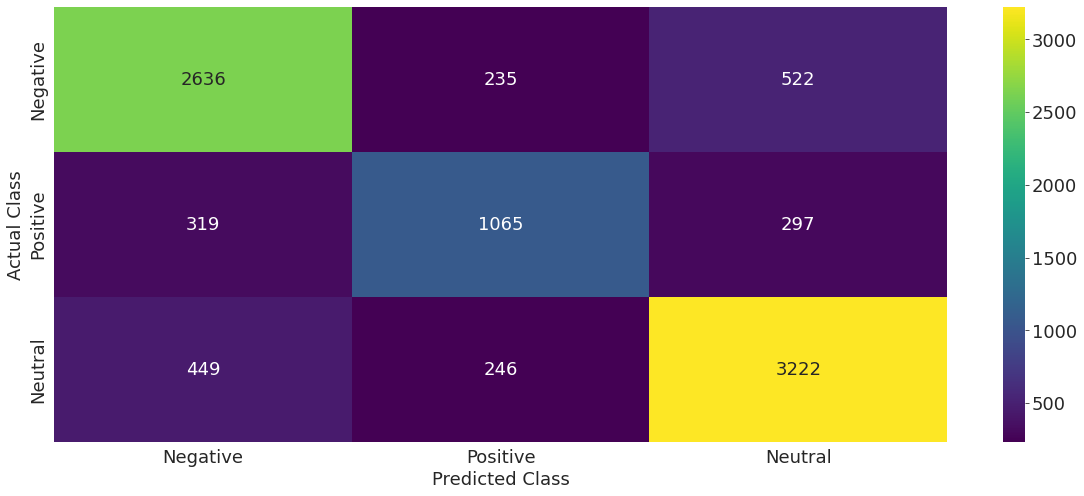

In [38]:
modelLR = LogisticRegression(max_iter=1000)
model_train(modelLR, X_train, X_test, y_train, y_test)